In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 
import matplotlib 
matplotlib.rcParams["figure.figsize"]=(20,10)

In [2]:
# load data 
df=pd.read_csv("Bengaluru_House_Data.csv")

In [3]:
df.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [4]:
#To find rows and columns
df.shape

(13320, 9)

In [5]:
# to find all the columns
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [6]:
# to count the values we have for all the kind in columns
#output will be 
df["area_type"].value_counts() # output will be sorted according to numbers

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [7]:
#we can drop unwanted columns
df2=df.drop(['area_type','society','balcony','availability'],axis='columns')

In [8]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [9]:
#checking is null values
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
df2.shape

(13320, 5)

In [11]:
#dropping null values
df3=df2.dropna()

In [12]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [13]:
df3.shape

(13246, 5)

# Data enginnering(Feature engineering)

Always remember to remove null and None value before u apply any data enginnering method

In [14]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [15]:
# let's add a new variable in place of size having a consistent type of values
# making a new column bhk which have value as int taking form size column at 0 place
#df3['size']=df3["size"].astype('strings')
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

D:\Users\AKuma368\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [16]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [17]:
#Analysing total_sqft variable
df3.total_sqft

0               1056
1               2600
2               1440
3               1521
4               1200
5               1170
6               2732
7               3300
8               1310
9               1020
10              1800
11              2785
12              1000
13              1100
14              2250
15              1175
16              1180
17              1540
18              2770
19              1100
20               600
21              1755
22              2800
23              1767
24               510
25              1250
26               660
27              1610
28              1151
29              1025
            ...     
13290           4050
13291            812
13292           1440
13293           2425
13294           2200
13295           1810
13296           1200
13297           1060
13298           1015
13299    2830 - 2882
13300           1500
13301           1454
13302           1075
13303            774
13304           1187
13305            500
13306        

In [18]:
# as in total sqft we can see we have some value as range (1234-1456). We must replace thos value with a mean value of this
# convert the variable to float first
def to_float(x):
    try:
        float(x)
    except:
        return False
    return True
    

In [19]:
#lets find the value in total_sqft not having float value
df3[~df3['total_sqft'].apply(to_float)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [20]:
# now clauculate the mean value
def to_calculate_mean(x):
    token= x.split('-')
    if len(token)==2:
        return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None
       

In [21]:
a='2100 - 2850	'
to_calculate_mean(a)

2475.0

In [22]:
#make a new dataframe to replace range value with its mean form total_sqft
df3['total_sqft']=df3['total_sqft'].apply(to_calculate_mean)
df3.head()

D:\Users\AKuma368\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [23]:
df3.loc[30]

location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
price               186
bhk                   4
Name: 30, dtype: object

In [24]:
# calculate price per square foot price/totat_sqft
df3['price_sq_ft']=(df3.price*100000)/(df3.total_sqft)

D:\Users\AKuma368\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [25]:
df3.head(10)

,location,size,total_sqft,bath,price,bhk,price_sq_ft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [26]:
df3.shape

(13246, 7)

In [27]:
df3.head()

,location,size,total_sqft,bath,price,bhk,price_sq_ft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


# Analyse price_sq_ft value

In [28]:
df3['price_sq_ft'].describe()

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_sq_ft, dtype: float64

In [29]:
df3.shape

(13246, 7)

In [30]:
df3.location.value_counts()

Whitefield                  534
Sarjapur  Road              392
Electronic City             302
Kanakpura Road              266
Thanisandra                 233
Yelahanka                   210
Uttarahalli                 186
Hebbal                      176
Marathahalli                175
Raja Rajeshwari Nagar       171
Bannerghatta Road           152
Hennur Road                 150
7th Phase JP Nagar          149
Haralur Road                141
Electronic City Phase II    131
Rajaji Nagar                106
Chandapura                   98
Bellandur                    96
Hoodi                        88
KR Puram                     88
Electronics City Phase 1     87
Yeshwanthpur                 85
Begur Road                   84
Sarjapur                     81
Harlur                       79
Kasavanhalli                 79
Banashankari                 74
Hormavu                      74
Ramamurthy Nagar             73
Kengeri                      73
                           ... 
Banashan

In [31]:
df3.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [32]:
df3.location.nunique() #counting unique value in a column

1304

In [33]:
location_count=df3.location.value_counts()

In [34]:
type(location_count)

pandas.core.series.Series

In [35]:
# we can delete the value of location for which we have data less than 10 (This is Known as Dimension Reduction)
Count=location_count<=10

In [36]:
len(location_count[location_count<=10]) #read seres propeties

1063

In [37]:
# see the value where location is less than 10
location_less_than_10=location_count[location_count<=10]

In [38]:
location_less_than_10

Ganga Nagar                 10
Sadashiva Nagar             10
Naganathapura               10
Nagappa Reddy Layout        10
Basapura                    10
1st Block Koramangala       10
Dairy Circle                10
Dodsworth Layout            10
Kalkere                     10
BTM 1st Stage               10
Gunjur Palya                10
Nagadevanahalli             10
KUDLU MAIN ROAD              9
Vishwanatha Nagenahalli      9
Chennammana Kere             9
Ejipura                      9
4th Block Koramangala        9
Yemlur                       9
Chandra Layout               9
B Narayanapura               9
Volagerekallahalli           9
Mathikere                    9
Kamakshipalya                9
Kaverappa Layout             9
Vignana Nagar                9
Jakkur Plantation            9
2nd Phase JP Nagar           9
Richmond Town                9
Medahalli                    9
Lingarajapuram               9
                            ..
Banashankari 6th Stage       1
Thyagraj

In [39]:
len(df3.location.unique()) # counting Unique values

1304

In [40]:
#let place all this value as other
df3.location=df3.location.apply(lambda x: 'other' if x in location_less_than_10 else x)

D:\Users\AKuma368\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [41]:
df3.location.nunique() #count all the unique values after removeing less than 10 values location

242

# Removal of outliers

In [42]:
df3.shape #still the same value as we did not removed the loction value with less than 10 we just replaced it with other

(13246, 7)

In [43]:
#lets remove the rows for which total_sqft/bhk is less than 300
df6=df3[~(df3.total_sqft/df3.bhk<300)]

In [44]:
df6.shape

(12502, 7)

In [45]:
df6.head()

,location,size,total_sqft,bath,price,bhk,price_sq_ft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [46]:
df6.price_sq_ft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_sq_ft, dtype: float64

In [47]:
df6.location.nunique()

242

In [48]:
#removing outliers for price per sq ft for each location
def remove_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df6.groupby('location'):
        mean=np.mean(subdf.price_sq_ft)  # calculating mean value of price_sq_ft for each location type
        sd_dev=np.std(subdf.price_sq_ft) # calculating standard deviation for each location type
        reduced_df=subdf[(subdf.price_sq_ft>(mean-sd_dev)) & (subdf.price_sq_ft<=(mean+sd_dev))] #Only  having value betwee mean-stdev and mean+stdev
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [49]:
# let apply the above function in dataframe
df7=remove_outliers(df6)

In [50]:
df7.shape

(10244, 7)

# Lets check for 2bhk and 3bhk how does price vary

In [51]:
# creating a function to create scatter plot for 2BHK and 3BHK for given location 
def scatter_plot_for_location(df,location):
    bhk2= df[(df.location==location) & (df.bhk==2)] #bhk2 is a dataframe where location= given loaction and BHK =2
    bhk3= df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label='3BHK',s=50)
    plt.xlabel('total square per fit')
    plt.ylabel('Price in lakhs')
    plt.title(location)
    plt.legend()

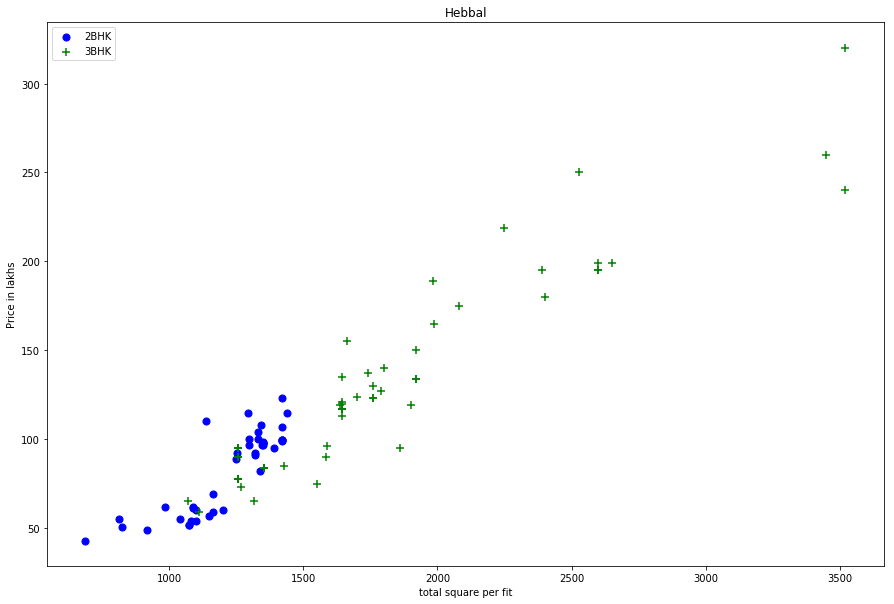

In [52]:
scatter_plot_for_location(df7,'Hebbal')

 Now we can see that the price of 2bhk(blue dot) is more than 3bhk(green+) from the plot. so we need to clean such data

Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment for the same location

bhk_stats ={
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}

In [53]:
def remove_bhk_outliers(df):
    exclude_index=np.array([]) # array to store tyhe index value of all excluded dataset
    for location , location_df in df.groupby('location'):
        bhk_stats={} # dictionary that stores the meta data of item as shown above
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                
                'mean':np.mean(bhk_df.price_sq_ft),
                'stdv':np.std(bhk_df.price_sq_ft),
                'count':bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5: # check if we have ant value in stats abd this count is greater than 5
                exclude_index=np.append(exclude_index,bhk_df[bhk_df.price_sq_ft<(stats['mean'])].index.values)
    return df.drop(exclude_index,axis='index')
                                                             

In [54]:
df8=remove_bhk_outliers(df7)

In [55]:
df8.shape

(7342, 7)

In [56]:
df7.shape

(10244, 7)

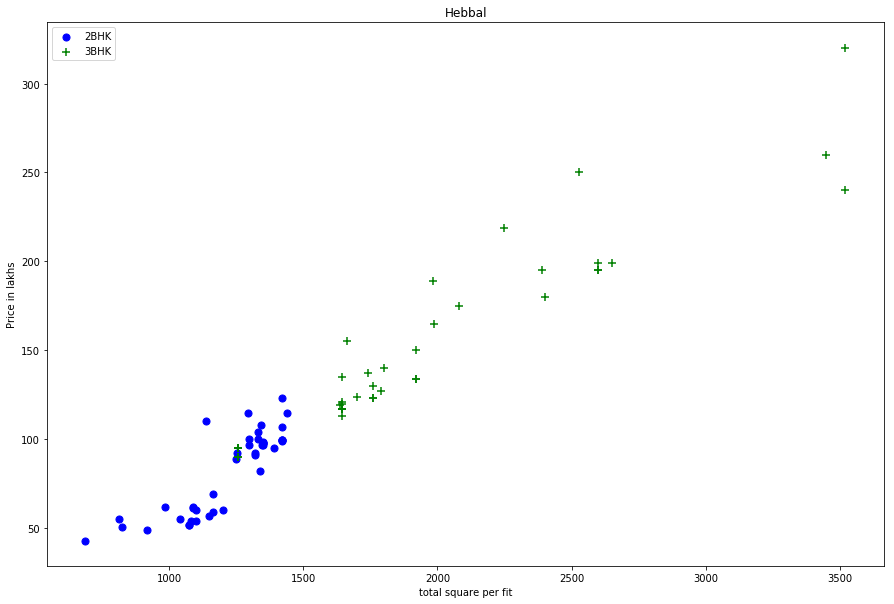

In [57]:
scatter_plot_for_location(df8,'Hebbal')

In [58]:
df8.head()

,location,size,total_sqft,bath,price,bhk,price_sq_ft
1,Devarachikkanahalli,2 BHK,1250.0,2.0,40.0,2,3200.000000
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,83.0,2,6916.666667
3,Devarachikkanahalli,2 BHK,1170.0,2.0,40.0,2,3418.803419
4,Devarachikkanahalli,3 BHK,1425.0,2.0,65.0,3,4561.403509
5,Devarachikkanahalli,2 BHK,947.0,2.0,43.0,2,4540.654699


Text(0, 0.5, 'Count')

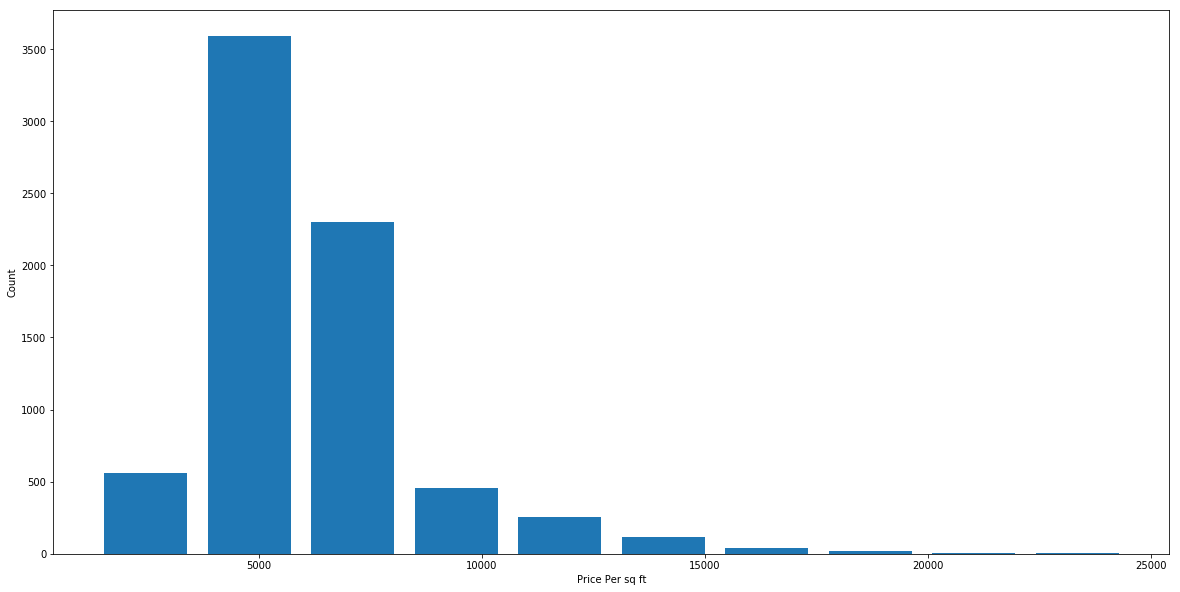

In [59]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
plt.hist(df8.price_sq_ft,rwidth=0.8)
plt.xlabel('Price Per sq ft')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

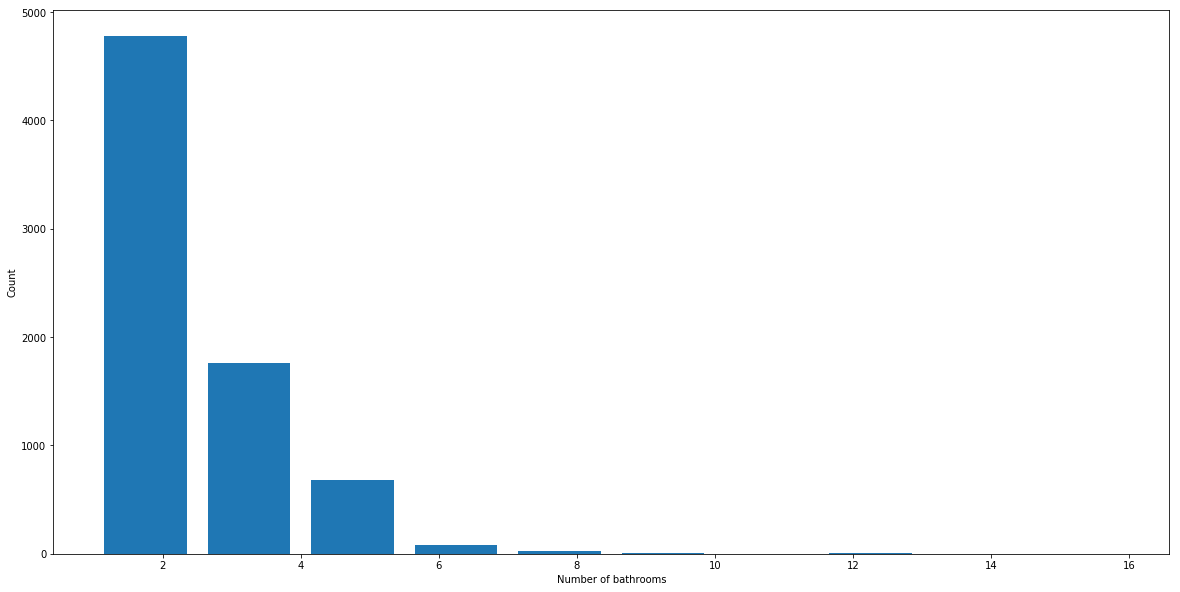

In [60]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

# Bathroom greater than number of room +2 is not normal so we remove those values

In [61]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_sq_ft
1637,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5232,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6702,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8405,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


Lets remove this

In [62]:
df9=df8[df8.bath<df8.bhk+2]

In [63]:
df9

,location,size,total_sqft,bath,price,bhk,price_sq_ft
1,Devarachikkanahalli,2 BHK,1250.0,2.0,40.00,2,3200.000000
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,83.00,2,6916.666667
3,Devarachikkanahalli,2 BHK,1170.0,2.0,40.00,2,3418.803419
4,Devarachikkanahalli,3 BHK,1425.0,2.0,65.00,3,4561.403509
5,Devarachikkanahalli,2 BHK,947.0,2.0,43.00,2,4540.654699
6,Devarachikkanahalli,2 BHK,1130.0,2.0,36.00,2,3185.840708
7,Devarachikkanahalli,3 BHK,1417.0,2.0,76.00,3,5363.443896
8,Devarachikkanahalli,2 BHK,1230.0,2.0,58.00,2,4715.447154
9,Devarachikkanahalli,3 BHK,1705.0,3.0,75.00,3,4398.826979
10,Devarachikkanahalli,2 BHK,1116.0,2.0,47.00,2,4211.469534


lets drop some unwanted column in order to build a model

In [64]:
df10=df9.drop(['size','price_sq_ft'],axis='columns')

In [65]:
df10.head()

,location,total_sqft,bath,price,bhk
1,Devarachikkanahalli,1250.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,40.0,2
4,Devarachikkanahalli,1425.0,2.0,65.0,3
5,Devarachikkanahalli,947.0,2.0,43.0,2


# Use One Hot Encoding For Location

In [66]:
#As location is categorical value
pd.get_dummies(df10.location)

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Changing location to numeric variable as categorical value is not easy to analyze

In [67]:
dummies=pd.get_dummies(df10.location)
dummies.head()

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
df11=pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')

In [69]:
df11.head()

,location,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,1250.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,1200.0,2.0,83.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,1170.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,1425.0,2.0,65.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Devarachikkanahalli,947.0,2.0,43.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
df12=df11.drop('location',axis='columns')

Lets begin the model

In [71]:
X=df12.drop('price',axis='columns')
X.head()

,total_sqft,bath,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
y=df12.price

In [73]:
y.head()

1    40.0
2    83.0
3    40.0
4    65.0
5    43.0
Name: price, dtype: float64

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [75]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
linear.fit(X_train,y_train)
linear.score(X_test,y_test)

0.7696224927820908

In [76]:
prediction=linear.predict(X_test)

In [77]:
from sklearn.metrics import r2_score
r2_score(y_test,prediction)

0.7696224927820908

In [78]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82622151, 0.81408431, 0.87757267, 0.84822717, 0.86091226])

In [79]:
df10.columns

Index(['location', 'total_sqft', 'bath', 'price', 'bhk'], dtype='object')

In [80]:
X.columns

Index(['total_sqft', 'bath', 'bhk', ' Devarachikkanahalli',
       '1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [81]:
def predict_price(location,sqft,bath,bhk):
    loc_index=np.where(X.columns==location)[0][0] # storing index of given location
    x=np.zeros(len(X.columns)) #x is an array of 0 of having length same as number of columns in x
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    if loc_index>=0:
        x[loc_index]=1 # as for dataframe we have value as 1 for data belonging to location
    return linear.predict([x])[0]

In [82]:
predict_price('Whitefield',1000,1,1)

51.960371986083636

In [83]:
import pickle
with open('Bnagalore_house_price_detection.pickle','wb') as f:
    pickle.dump(linear,f)

In [84]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))